# Primeros dias, aprendiendo Lalsuite y demás paquetes

Documentación: https://lscsoft.docs.ligo.org/lalsuite/lalsuite/index.html

In [142]:
import numpy as np 
import lalsimulation as lalsim 
import lal
import matplotlib.pyplot as plt
import math

## Generating Different Waveforms

We are going to generate different waveforms for the same parameters of masses, spins, inclination, etc. First of all, we will just generate a simple wave in the time domain and learn how does lalsim works. Then, we create another wave using a different approximant and finally we generate a frequency domain waveform. 

We will restrict ourselves to the most dominant modes (2,2) and (2,-2) to learn how does the different paramenters affect the most simple waveform. If we wish to take into account the rest of the modes we can substitute ***waveform_params*** for ***None*** in the functions SimInspiralChooseTDWaveform and SimInspiralChooseFDWaveform

### Time-domain Waveform

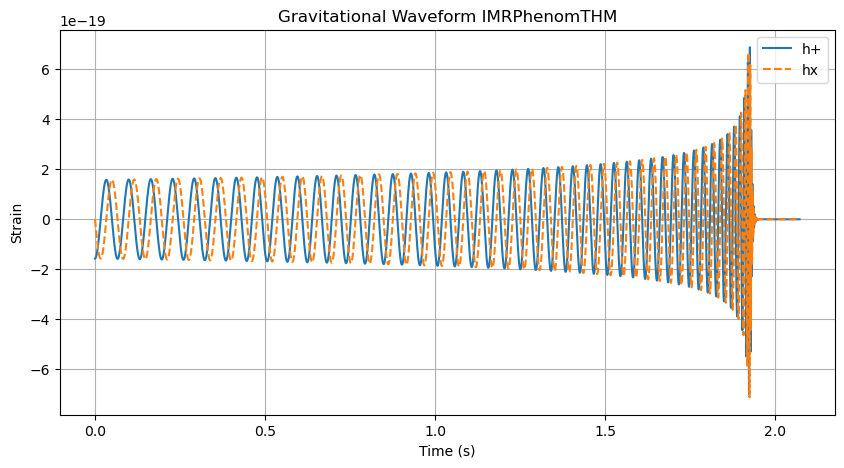

In [143]:
mass1 = 30 * lal.MSUN_SI # Mass of the first BH of GW150914 times the mass of the Sun in SI units
mass2 = 30 * lal.MSUN_SI # Mass of the second BH of GW150914 times the mass of the Sun in SI units

spin1x = 0.0 # x-component of Dimensionless Spin of the first BH
spin1y = 0.0 # y-component of Dimensionless Spin of the first BH
spin1z = 0.0 # z-component of Dimensionless Spin of the first BH
spin2x = 0.0 # x-component of Dimensionless Spin of the second BH
spin2y = 0.0 # y-component of Dimensionless Spin of the second BH
spin2z = 0.0 # z-component of Dimensionless Spin of the second BH

r = 1e6 * lal.PC_SI # Distance times the definition of a parsec in meters
inclination = 0 # Inclination angle of the binary system (iota)
phiRef = 0 # orbital phase at reference, half of main GW phase at reference
eccentricity=0.0 # eccentricity at reference epoch

delta_T = 1.0/4096.0               # series sampling interval
f_min = 15.0               # start frequency of inspiral
f_max = 250.0                # end frequency of inspiral: 0 means use default
f_ref = f_min                # reference frequency: 0 means waveform end

# Post-Newtonian Approximantion
Approximant = "IMRPhenomTHM" 

# Modes
mode_list = [[2, 2], [2, -2]]

# Create the waveform parameters structure
waveform_params = lal.CreateDict()

mode_array = lalsim.SimInspiralCreateModeArray()
for l, m in mode_list:
    lalsim.SimInspiralModeArrayActivateMode(mode_array, l, m)
lalsim.SimInspiralWaveformParamsInsertModeArray(waveform_params, mode_array)

with lal.no_swig_redirect_standard_output_error():
    # Generate the waveform
    hplus, hcross = lalsim.SimInspiralChooseTDWaveform(
        mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, r, inclination, phiRef, 0.0, eccentricity, 0.0,
        delta_T, f_min, f_ref, waveform_params, lalsim.GetApproximantFromString(Approximant)
    )

# Extract time series for both plus (h_plus) and cross (h_cross) polarizations
h_plus = hplus.data.data # Returns a numpy array of strain data
h_cross = hcross.data.data
time = np.arange(len(h_plus)) * delta_T


# Plot the plus/cross polarization of the gravitational wave
plt.figure(figsize=(10, 5))
plt.plot(time, h_plus, label='h+')
plt.plot(time, h_cross, "--", label='hx',)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title(f'Gravitational Waveform {Approximant}')
plt.legend()
plt.grid()
plt.show()

#### Time-domain Waveform using other Approximant


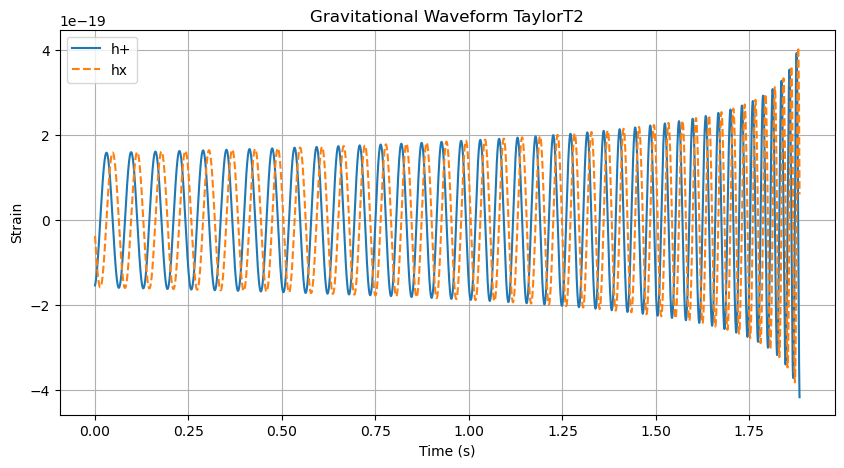

In [144]:
# Post-Newtonian Approximantion
Approximant = "TaylorT2" 

with lal.no_swig_redirect_standard_output_error():
    # Generate the waveform
    hplus, hcross = lalsim.SimInspiralChooseTDWaveform(
        mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, r, inclination, phiRef, 0.0, eccentricity, 0.0,
        delta_T, f_min, f_ref, waveform_params, lalsim.GetApproximantFromString(Approximant)
    )

# Extract time series for both plus (h_plus) and cross (h_cross) polarizations
h_plus = hplus.data.data
h_cross = hcross.data.data
time = np.arange(len(h_plus)) * delta_T


# Plot the plus/cross polarization of the gravitational wave
plt.figure(figsize=(10, 5))
plt.plot(time, h_plus, label='h+')
plt.plot(time, h_cross, "--", label='hx',)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title(f'Gravitational Waveform {Approximant}')
plt.legend()
plt.grid()
plt.show()

### Frequency-domain Waveform


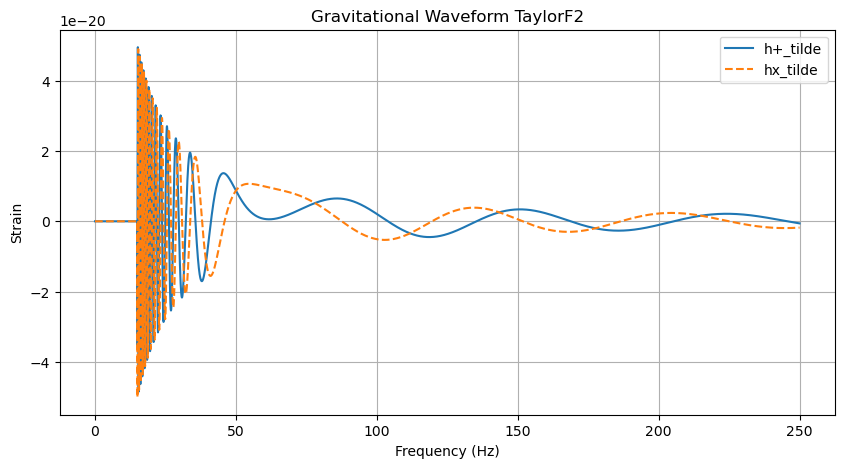

In [145]:
delta_F = 1.0/256.0 # series sampling interval

# Post-Newtonian Approximantion
Approximant = "TaylorF2" 

with lal.no_swig_redirect_standard_output_error():
    # Generate the waveform
    hplustilde, hcrosstilde = lalsim.SimInspiralChooseFDWaveform(
        mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, r, inclination, phiRef, 0.0, eccentricity, 0.0,
        delta_F, f_min, f_max, f_ref, waveform_params, lalsim.GetApproximantFromString(Approximant)
    )

# Extract frequency series for both plus (h_plus) and cross (h_cross) polarizations
h_plus_tilde = hplustilde.data.data
h_cross_tilde = hcrosstilde.data.data
frequency = np.arange(len(h_plus_tilde)) * delta_F


# Plot the plus/cross polarization of the gravitational wave
plt.figure(figsize=(10, 5))
plt.plot(frequency, h_plus_tilde, label='h+_tilde')
plt.plot(frequency, h_cross_tilde, "--", label='hx_tilde',)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain')
plt.title(f'Gravitational Waveform {Approximant}')
plt.legend()
plt.grid()
plt.show()

##### Conclusions:

    We see that choosing a correct Approximant is very important, we see the difference that it makes more clearly in the Jupyter Notebook Plot_Approximants.ipynb where we plot different Time-Domain Waveforms. In fact, parameters as spin or eccentricity are only considered in certain Approximants

    Then, we also can see the differences between considering just the most dominant modes or using all of them. It is easier to see this difference when we extract the amplitude and phase of the waveforms (and using a nonzero inclination).

    Finally, we observe how the frequency plot differs from the time domain plot. The majority of the amplitude is located in the Inspiral where the binary system rotates in the same radius and thus we measure the same frequency. Both the Time and specially the Frequency domain plots are modified by the parameter h_min.


## Extracting Information from the waveform

We will be using the first result, i. e. using IMRPhenomTHM Approximant in the Time Domain. 

First of all, we define a function to simulate a waveform for the parameters described at the beggining of the Jupyter Notebook for an arbitrary Approximant. As before, we will only consider the most dominant modes. 

Then, we extract the useful information defining a complex strain as 

$$
h_{complex}=h_+ - i h_\times.
$$

### Function to Generate the same TD waveform for an arbitrary Approximant 

In [146]:
def Choose_Approximant(Approximant): # Function to get a simple waveform using the parameters described above
    with lal.no_swig_redirect_standard_output_error():
        hplus, hcross = lalsim.SimInspiralChooseTDWaveform(
        mass1, mass2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, r, inclination, phiRef, 0.0, eccentricity, 0.0,
        delta_T, f_min, f_ref, waveform_params, lalsim.GetApproximantFromString(Approximant)
    )

    # Extract time series for both plus (h_plus) and cross (h_cross) polarizations
    h_plus = hplus.data.data
    h_cross = hcross.data.data 
    time = np.arange(len(h_plus)) * delta_T

    return h_plus, h_cross, time # The data is returned as Numpy arrays, we lost information of the epoch, etc which we won't use in this example

### Extracting the Amplitude and the Phase

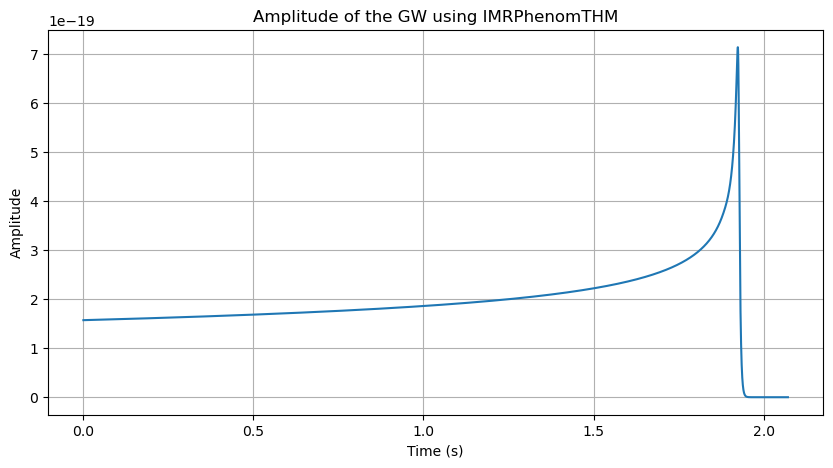

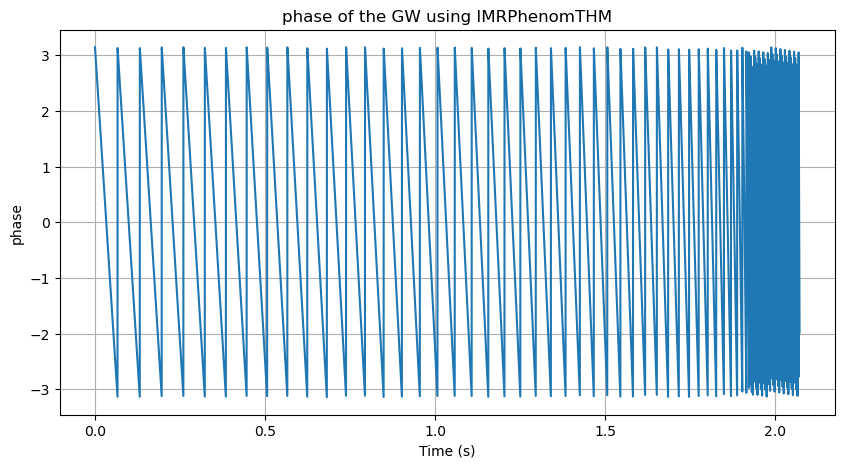

In [147]:
# Post-Newtonian Approximantion
Approximant = "IMRPhenomTHM" 

h_plus, h_cross, time = Choose_Approximant(Approximant)

h_total = h_plus - 1j * h_cross # Define the complex strain

amplitude = np.abs(h_total) # Obtain the Amplitud directly from the complex strain
phase_disc = np.angle(h_total) # Obtain the Phase directly from the complex strain

# Plotting both results

# Plot the amplitude of the gravitational wave
plt.figure(figsize=(10, 5))
plt.plot(time, amplitude, label='Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Amplitude of the GW using {Approximant}')
plt.grid()
plt.show()

# Plot the phase of the gravitational wave
plt.figure(figsize=(10, 5))
plt.plot(time, phase_disc, label='phase')
plt.xlabel('Time (s)')
plt.ylabel('phase')
plt.title(f'phase of the GW using {Approximant}')
plt.grid()
plt.show()

### Continuous phase and Frequency

We observe that the form of the phase is weird. This is due to the fact that whenever $\phi=-\pi$ it jumps to $\phi=\pi$ so we have a lot of singular points. Knowing this we can compute the true phase of the waveform. 

Moreover, we obtain the frequancy associated with each point. For this we use the numpy function gradient (for an array) an get the frequency by dividing over $2\pi$

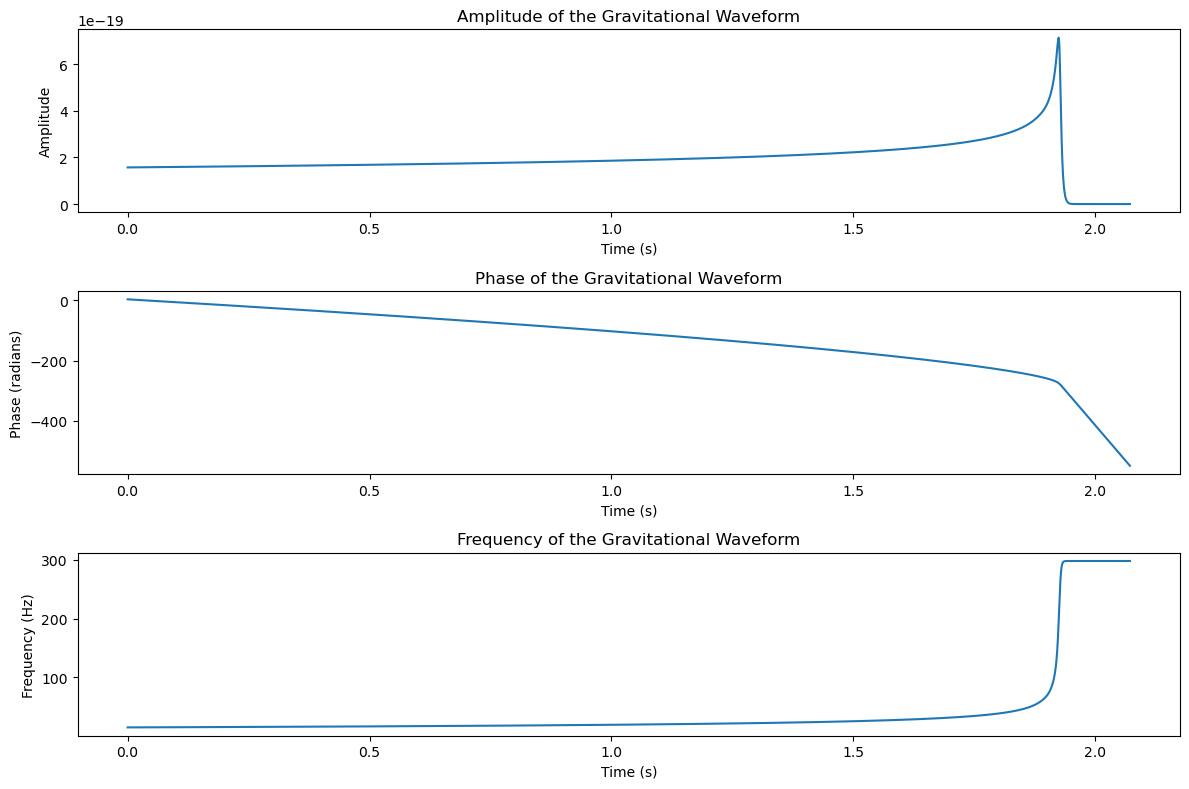

In [148]:
phase = []
phase.append(phase_disc[0])

for n in range(1, len(phase_disc)):
 
    phase_diff = phase_disc[n] - phase_disc[n-1]

    if phase_diff < math.pi:
        phase.append(phase[n-1]+phase_diff)
    else:
        phase.append(phase[n-1]+phase_diff-2*math.pi)

# Frequency f(t)
dphi_dt = np.gradient(phase, delta_T)
frequency = np.abs(dphi_dt / (2 * math.pi))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the amplitude A(t)
plt.subplot(3, 1, 1)
plt.plot(time, amplitude)
plt.title('Amplitude of the Gravitational Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the phase phi(t)
plt.subplot(3, 1, 2)
plt.plot(time, phase)
plt.title('Phase of the Gravitational Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Phase (radians)')

# Plot the frequency f(t)
plt.subplot(3, 1, 3)
plt.plot(time, frequency)
plt.title('Frequency of the Gravitational Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

##### Conclusions
    We see easily that the amplitude, phase and frequency change enormously when the binary system colapses and merge. Unlike in the Inspiral where the three functions could be approximated by a linear (nearly constant) function.

## Two Waveforms

To continue,We will simulate two waveforms using different Approximants so we can see the differences and how the results vary depending on the approximant in detail. The formulae will be the same as before so we will not detail it.

### Simulating both Waveforms

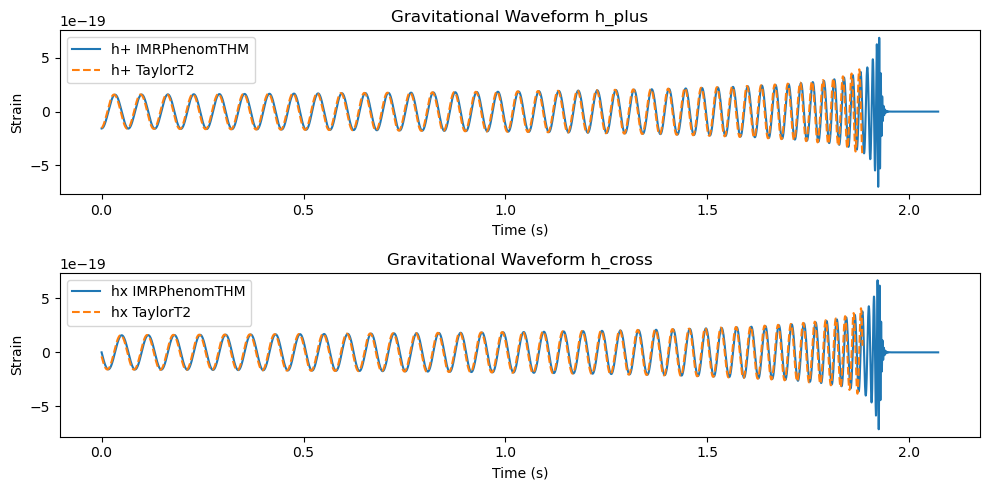

In [149]:
Approximant_1 = "IMRPhenomTHM"
Approximant_2 = "TaylorT2"

# Generating both Waveform to glue together
h_plus_1, h_cross_1, time_1 = Choose_Approximant(Approximant_1)
h_plus_2, h_cross_2, time_2 = Choose_Approximant(Approximant_2)

# Plots of the strain of the waveform
plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(time_1, h_plus_1, label=f'h+ {Approximant_1}')
plt.plot(time_2, h_plus_2, "--", label=f'h+ {Approximant_2}',)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Gravitational Waveform h_plus')
plt.legend()


plt.subplot(2,1,2)
plt.plot(time_1, h_cross_1, label=f'hx {Approximant_1}')
plt.plot(time_2, h_cross_2, "--", label=f'hx {Approximant_2}')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Gravitational Waveform h_cross')
plt.legend()


plt.tight_layout()
plt.show()



### Defining a function to obtain the continuous phase given an discontinuous fase

In [150]:
def Phase_Cont(phase_disc):
    phase = []
    phase.append(phase_disc[0])
    
    for n in range(1, len(phase_disc)):

        phase_diff = phase_disc[n] - phase_disc[n-1]

        if phase_diff < math.pi:
            phase.append(phase[n-1]+phase_diff)
        else:
            phase.append(phase[n-1]+phase_diff-2*math.pi)
    return np.array(phase)

Extract the useful information. Amplitude, phase and frequencies

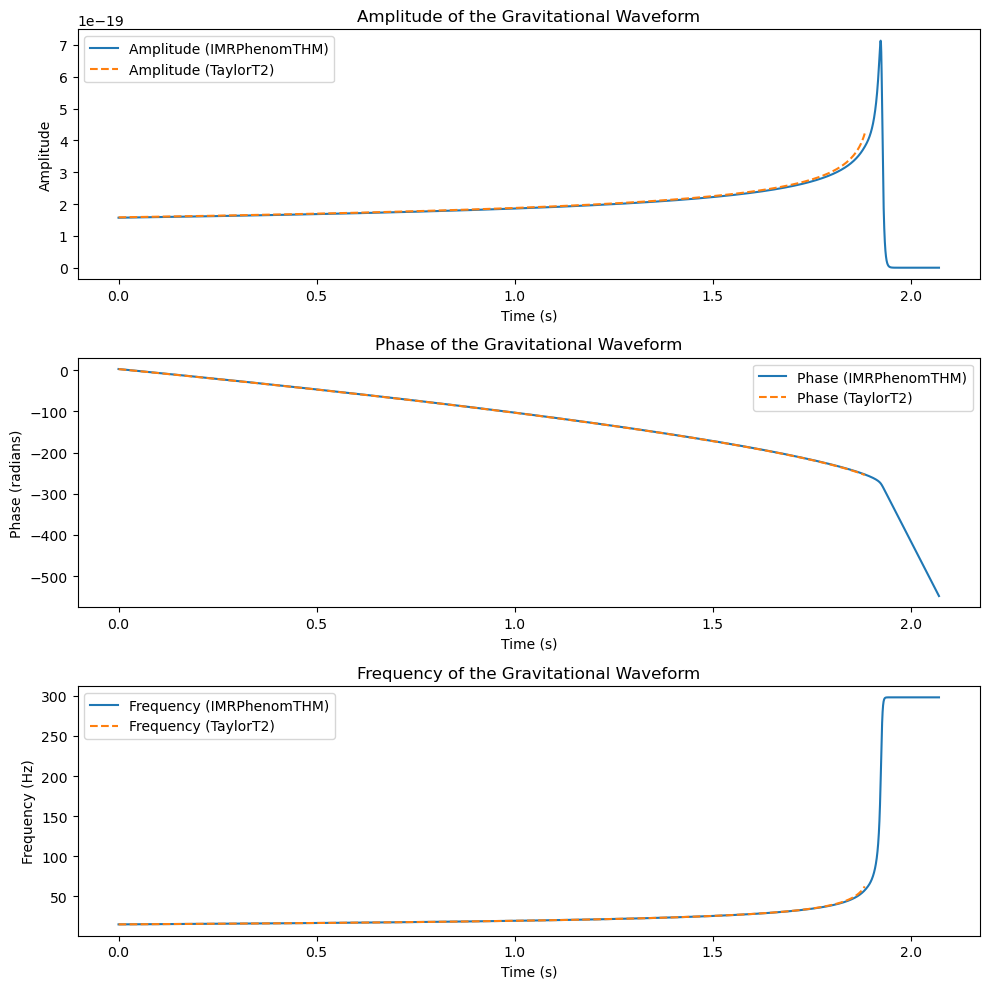

In [151]:
# Create the complex strain
h_complex_1 = h_plus_1 - 1j * h_cross_1
h_complex_2 = h_plus_2 - 1j * h_cross_2

# Amplitude A(t) for both waveforms
amplitude_1 = np.abs(h_complex_1)
amplitude_2 = np.abs(h_complex_2)

# Phase phi(t) for both waveforms
phase_1_disc = np.angle(h_complex_1)
phase_2_disc = np.angle(h_complex_2)

phase_1 = Phase_Cont(phase_1_disc)
phase_2 = Phase_Cont(phase_2_disc)

# Frequency f(t) for both waveforms
dphi_dt_1 = np.gradient(phase_1, delta_T)
dphi_dt_2 = np.gradient(phase_2, delta_T)

frequency_1 = np.abs(dphi_dt_1 / (2 * np.pi))
frequency_2 = np.abs(dphi_dt_2 / (2 * np.pi))
# frequency1ok=np.delete(frequency_1,np.where(frequency_1>400)[0])

# Plot the results
plt.figure(figsize=(10, 10))

# Plot the amplitude A(t)
plt.subplot(3, 1, 1)
plt.plot(time_1, amplitude_1, label=f'Amplitude ({Approximant_1})')
plt.plot(time_2, amplitude_2, label=f'Amplitude ({Approximant_2})', linestyle='dashed')
plt.title('Amplitude of the Gravitational Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_1, phase_1, label=f'Phase ({Approximant_1})')
plt.plot(time_2, phase_2, label=f'Phase ({Approximant_2})', linestyle='dashed')
plt.title('Phase of the Gravitational Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Phase (radians)')
plt.legend()

# Plot the instantaneous frequency f(t)
plt.subplot(3, 1, 3)
plt.plot(time_1, frequency_1, label=f'Frequency ({Approximant_1})')
plt.plot(time_2, frequency_2, label=f'Frequency ({Approximant_2})', linestyle='dashed')
plt.title('Frequency of the Gravitational Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()

plt.tight_layout()
plt.show()



### Calculating the differences between Approximants

We obtain the differences between both simulations. To make this possible we truncate the longest waveform so that we can compare easily the comparable sections. For example, this would mean that the comparison of a full waveform and an only-inspiral waveform just takes into account the inspiral part and discard the rest of the simulation

In [152]:
import sys

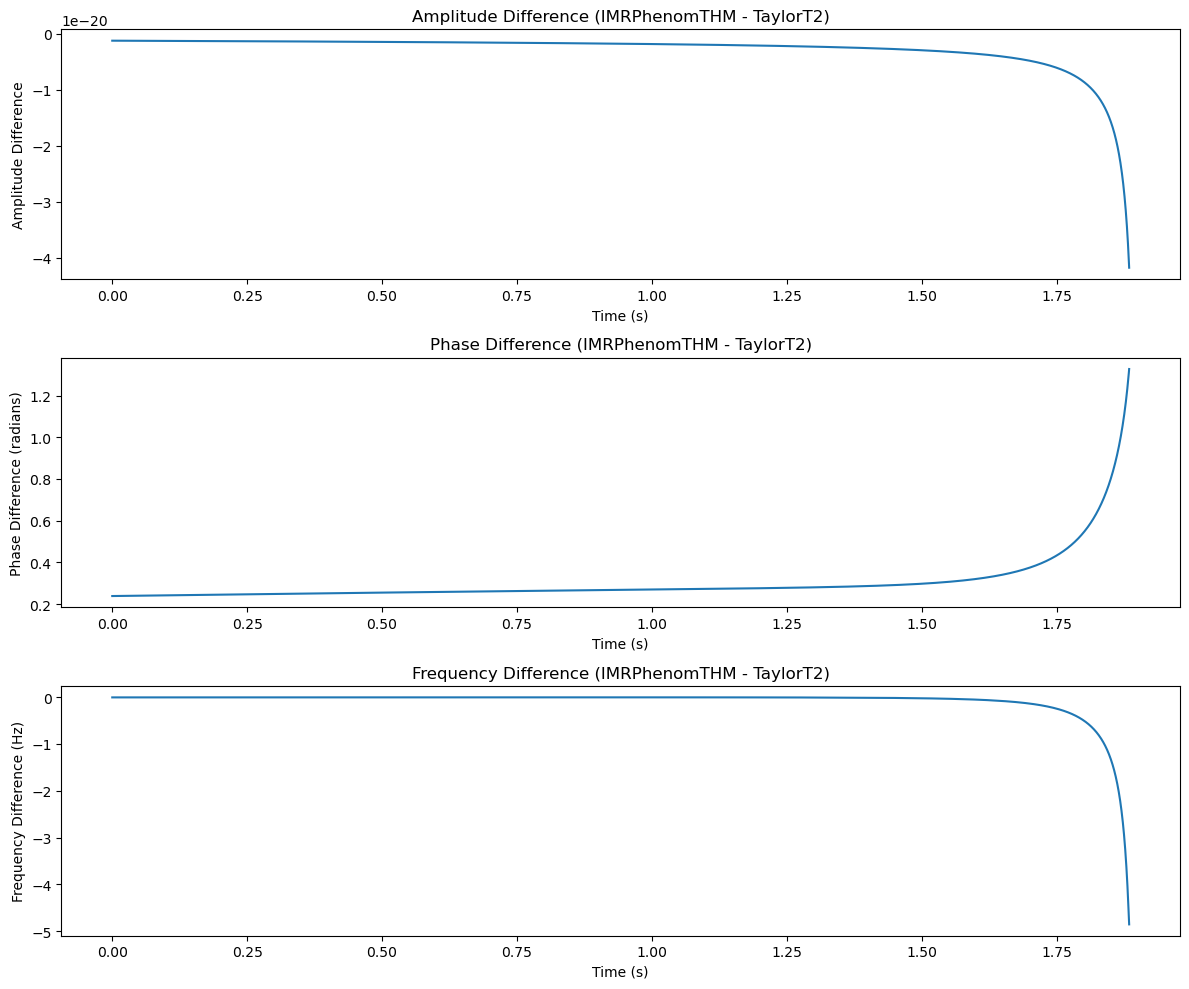

In [153]:
N_medidas = min(len(time_1), len(time_2)) # We only take into account the comparable points, so we cut both of them at the same final time (inspiral)

h_plus_1 = h_plus_1[:N_medidas]
h_cross_1 = h_cross_1[:N_medidas]
h_plus_2 = h_plus_2[:N_medidas]
h_cross_2 = h_cross_2[:N_medidas]

time_12 = time_1[:N_medidas]

if not np.array_equal(time_12, time_2[:N_medidas]):  
    print("Error: Truncar las medidas no da el mismo valor para ambos tiempos.")
    sys.exit(1)

# Create the complex strain
h_complex_1 = h_plus_1 - 1j * h_cross_1
h_complex_2 = h_plus_2 - 1j * h_cross_2

# Difference in Amplitude A(t) and phase
amplitude_dif= np.abs(h_complex_1) - np.abs(h_complex_2)

phase_1 = Phase_Cont(np.angle(h_complex_1))
phase_2 = Phase_Cont(np.angle(h_complex_2))
phase_dif = phase_1 - phase_2 

# Difference in frequency f(t)
dphi_dt_1 = np.gradient(phase_1, delta_T)
dphi_dt_2 = np.gradient(phase_2, delta_T)

frequency_1 = np.abs(dphi_dt_1 / (2 * np.pi))
frequency_2 = np.abs(dphi_dt_2 / (2 * np.pi))

frequency_dif = frequency_1 - frequency_2

# Plot the results

plt.figure(figsize=(12, 10))

# Plot the amplitude difference A(t)
plt.subplot(3, 1, 1)
plt.plot(time_12, amplitude_dif)
plt.title(f'Amplitude Difference ({Approximant_1} - {Approximant_2})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude Difference')

# Plot the phase difference phi(t)
plt.subplot(3, 1, 2)
plt.plot(time_12, phase_dif)
plt.title(f'Phase Difference ({Approximant_1} - {Approximant_2})')
plt.xlabel('Time (s)')
plt.ylabel('Phase Difference (radians)')

# Plot the frequency difference f(t)
plt.subplot(3, 1, 3)
plt.plot(time_12, frequency_dif)
plt.title(f'Frequency Difference ({Approximant_1} - {Approximant_2})')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Difference (Hz)')

plt.tight_layout()
plt.show()

##### Conclusions:

    This plots tell us that both approximants give nearly the same values far from the merger, but they start separating when the bynary system is near its colapse. This is due to the fact that TaylorT2 only simulates the inspiral part of the GW, therefore, it fails near the merger. 

    We can make more tests seeing what happens when we use a Approximant different than TaylorT2, for example another IMRPhenom or an EOB, even TaylorT4. Although we can expect that the differences will be minimal

## Matching

Finally, we obtain the match between two waveforms. This is a simple test to learn how does it work. For that, we install the pycbc package and different functions. To use what we learned from lalsim we will not use the simulations of pycbc, so we will convert the data from lalsim to pycbc. 

The test is done using IMRPhenomTHM and TaylorT4, although it is interesting to see how does it differ using another full simulation like EOB

In [154]:
# Match Computation

from pycbc.filter import match as simple_match, optimized_match
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.types import TimeSeries, FrequencySeries
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform.utils import coalign_waveforms

### Generating two Waveforms

As we said before, we have to convert the data. The function Choose_Approximant alreasy gives us a numpy array so we only have to write it as a TimeSeries from pycbc. It is important to take into account the lost information. For example we completely ignore the epoch and other informations that lalsim (or pycbc) gives us because it was not important to this example.

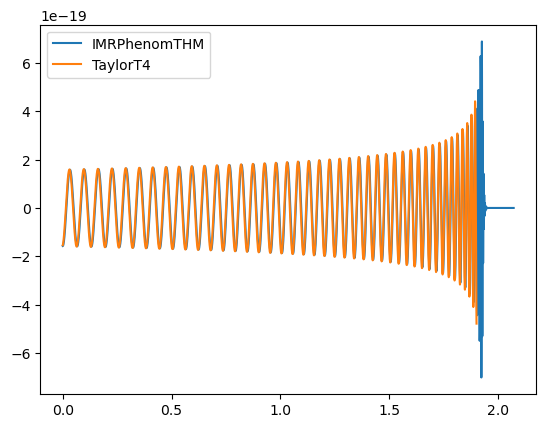

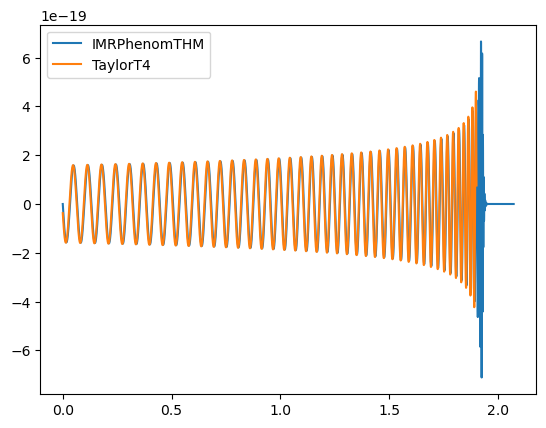

In [155]:
Approximant_1 = "IMRPhenomTHM"
Approximant_2 = "TaylorT4"

# Generating both Waveform
h_plus_1, h_cross_1, time_1 = Choose_Approximant(Approximant_1)
h_plus_2, h_cross_2, time_2 = Choose_Approximant(Approximant_2)

# Convert the data obtained from a numpy array to a PyCBC TimeSeries
hp_1 = TimeSeries(h_plus_1, delta_t=delta_T) 
hp_2 = TimeSeries(h_plus_2, delta_t=delta_T)
hc_1 = TimeSeries(h_cross_1, delta_t=delta_T) 
hc_2 = TimeSeries(h_cross_2, delta_t=delta_T) 

# Plots of the plus polarizations for both waveforms
plt.plot(hp_1.sample_times, hp_1, label = f'{Approximant_1}')
plt.plot(hp_2.sample_times, hp_2, label = f'{Approximant_2}')
plt.legend()
plt.show()

# Plots of the plus polarizations for both waveforms
plt.plot(hc_1.sample_times, hc_1, label = f'{Approximant_1}')
plt.plot(hc_2.sample_times, hc_2, label = f'{Approximant_2}')
plt.legend()
plt.show()


### Defining the match funcion

The most important thing to take into account is that if we are analysing a FD, we must compute the match using complex strain. however, if the waveform is in TD form we compute it using just the real part of the strain. To Obtain the match we have to compare the waveforms with the PSD (Power Spectral Density) $S_n(f)$. To describe it we use the typical Noise of the Advanced LIGO detectors (Zero Detuned and High Powered).

In [ ]:
def perform_match(hnr, hap, f_lower, f_high, optimized = False, return_phase = False):
    FD = isinstance(hnr, FrequencySeries)
    if not FD: 
        hnr, hap = hnr.real(), hap.real()
    
    # Match signal sizes
    lenght = min(len(hnr), len(hap))
    hnr.resize(lenght); hap.resize(lenght)

    # Compute PSD
    if FD: 
        delta_f = hnr.delta_f
    else:
        delta_f = 1/hnr.duration
        #lenght = lenght//2 + 1
    
    psd = aLIGOZeroDetHighPower(lenght, delta_f, f_lower)
    
    # Compute Match
    match_kwargs = dict(vec1 = hnr, vec2 = hap, psd = psd, low_frequency_cutoff = f_lower, high_frequency_cutoff = f_high, return_phase = return_phase)
    return optimized_match(**match_kwargs) if optimized else simple_match(**match_kwargs, subsample_interpolation = True)


### Computing the Match

Match:  0.9947370447027202
Index:  7779.367323711997
Phi:  0.0484101969847927


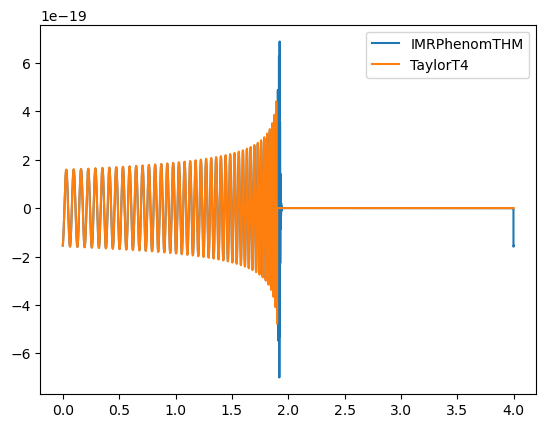

In [158]:
# Computation of the Match
match, Index, delta_phi= perform_match(hp_1, hp_2, f_lower = f_min, f_high = f_max, return_phase = True)

print('Match: ', match)
print('Index: ', Index)
print('Phi: ', delta_phi)

# Waveforms Coaligned 
h1_aligned, h2_aligned = coalign_waveforms(hp_1, hp_2)

# Plot of the coaligned waveforms
plt.plot(h1_aligned.sample_times, h1_aligned, label = f'{Approximant_1}')
plt.plot(h2_aligned.sample_times, h2_aligned, label = f'{Approximant_2}')
plt.legend()
plt.show()

##### Conclusions:

    We observe that as expected both waveforms where incredibly similar (they have the same parameters) and that we only need a few simple functions to compute this simple match. It is interesting to see how does the cumbers chage if we use other Approximants and waveform with vastly different parameters.

***Yet to think:***

    - ¿Why does the program only uses h_p? In the TD it makes no difference, but shouldn't it be h_{complex}?
    - ¿Why does the program change slen in the TD case?
    - ¿What is Index and Phi?

